In [11]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Load IRIS Dataset
iris = datasets.load_iris()

#Dataset totoaly has four features
#Choose "petal length", "petal width" two features
X = iris["data"][:, (2, 3)]
#Load data label
y = iris["target"]

In [13]:
#In iris dataset, 0 = setosa flower, 1 = versicolor flower, 2 = vignica flower
#In this visualization, we choose setosa and versicolor to do a binary classificaion
setosa_or_versicolor = (y == 0)|(y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# We define a Support-Vector classifier
# Kernel is linear and penalty is positive infinte
clf = SVC(kernel = "linear", C = float('inf'))
clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
#Define decision boundary function to plot result.
def plot_decision_boundary(clf, xmin, xmax):
    # Load parameter from model
    w = clf.coef_[0]
    b = clf.intercept_[0]
    
    x0 = np.linspace(xmin, xmax, 200)
    
    #Define linear decision boundary:
    # w0*x0 + w1*x1 + b = 0
    dec_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    #Boundary distance
    margin = 1/w[1]
    up_bound = dec_boundary + margin
    down_bound = dec_boundary - margin 
    
    # Support Vector Point
    svs = clf.support_vectors_
    #Plotting
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, dec_boundary, "k-", linewidth=2)
    plt.plot(x0, up_bound, "k--", linewidth=2)
    plt.plot(x0, down_bound, "k--", linewidth=2)



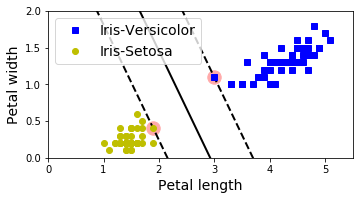

In [15]:
plt.figure(figsize=(12,2.7))
plt.subplot(122)
plot_decision_boundary(clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()
